# Topic Modelling:

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import random
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
df = pd.read_csv('npr.csv')

# Functions:

In [4]:
def display_info():
    display(df.head())
    display(df.sample(5))
    display(df.tail())

In [5]:
def tight_graph():
    plt.tight_layout()
    plt.show()

# Modelling NPR Articles:

In [6]:
display_info()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


,Article
889,How could the first Super Bowl of the Trump er...
1271,Four newly discovered frog species are so tiny...
10472,South Africa has decided to withdraw from the ...
6465,”This is the message I have come to bring you ...
45,A Jewish farming couple from Canada says it ha...


,Article
11987,The number of law enforcement officers shot an...
11988,"Trump is busy these days with victory tours,..."
11989,It’s always interesting for the Goats and Soda...
11990,The election of Donald Trump was a surprise to...
11991,Voters in the English city of Sunderland did s...


In [7]:
df.isnull().sum()

Article    0
dtype: int64

In [8]:
df['length_of_article'] = df['Article'].apply(lambda x: len(x))

In [9]:
df.head()

,Article,length_of_article
0,"In the Washington of 2016, even when the polic...",7646
1,Donald Trump has used Twitter — his prefe...,3856
2,Donald Trump is unabashedly praising Russian...,4990
3,"Updated at 2:50 p. m. ET, Russian President Vl...",2684
4,"From photography, illustration and video, to d...",10552


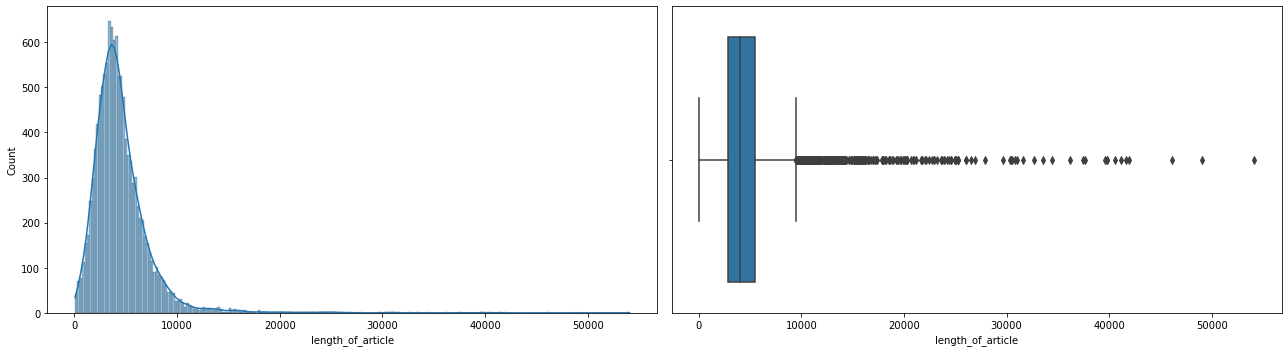

In [10]:
fig, (ax,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (18,5))

sns.histplot(data = df, x ='length_of_article', ax = ax, kde = True)
sns.boxplot(data = df, x = 'length_of_article', ax =ax2)

tight_graph()

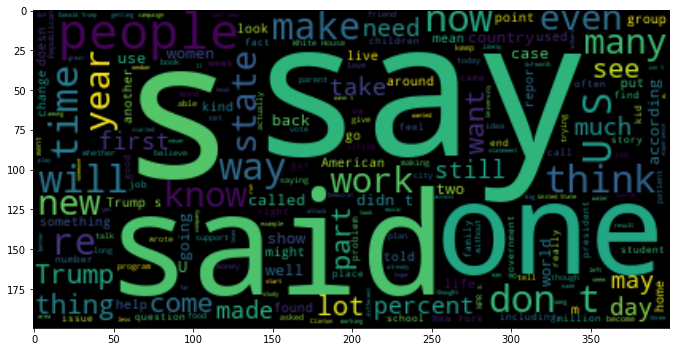

In [11]:
fig ,ax = plt.subplots(figsize = (12,5))

wordcloud2 = WordCloud().generate(' '.join(df['Article']))
plt.imshow(wordcloud2, interpolation="bilinear")

tight_graph()

In [12]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
nmf_model = NMF(n_components = 7, random_state = 42)
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
lda = LatentDirichletAllocation(n_components=7,random_state=42)

In [21]:
df_nmf = tfidf.fit_transform(df['Article'])
df_lda = cv.fit_transform(df['Article'])

In [22]:
nmf_model.fit(df_nmf)
lda.fit(df_lda)

LatentDirichletAllocation(n_components=7, random_state=42)

In [23]:
for i in range(3):
    random_word_id = random.randint(0,54776)
    print(tfidf.get_feature_names()[random_word_id])
    
for i in range(3):
    random_word_id = random.randint(0,54776)
    print(cv.get_feature_names()[random_word_id])

pacts
vendors
cresting
prospects
totemic
monkees


In [27]:
def print_topics(model1, model2):
    for index,topic in enumerate(model1.components_):
        print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
        print([model2.get_feature_names()[i] for i in topic.argsort()[-15:]])
        print('\n')

In [28]:
print_topics(nmf_model,tfidf)

THE TOP 15 WORDS FOR TOPIC #0
['new', 'research', 'like', 'patients', 'health', 'disease', 'percent', 'women', 'virus', 'study', 'water', 'food', 'people', 'zika', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['gop', 'pence', 'presidential', 'russia', 'administration', 'election', 'republican', 'obama', 'white', 'house', 'donald', 'campaign', 'said', 'president', 'trump']


THE TOP 15 WORDS FOR TOPIC #2
['senate', 'house', 'people', 'act', 'law', 'tax', 'plan', 'republicans', 'affordable', 'obamacare', 'coverage', 'medicaid', 'insurance', 'care', 'health']


THE TOP 15 WORDS FOR TOPIC #3
['officers', 'syria', 'security', 'department', 'law', 'isis', 'russia', 'government', 'state', 'attack', 'president', 'reports', 'court', 'said', 'police']


THE TOP 15 WORDS FOR TOPIC #4
['primary', 'cruz', 'election', 'democrats', 'percent', 'party', 'delegates', 'vote', 'state', 'democratic', 'hillary', 'campaign', 'voters', 'sanders', 'clinton']


THE TOP 15 WORDS FOR TOPIC #5
['love', 've', 'don', 'al

In [29]:
print_topics(lda,cv)

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

In [31]:
topic_results_nmf = nmf_model.transform(df_nmf).argmax(axis = 1)
topic_results_lda = lda.transform(df_lda).argmax(axis = 1)

In [32]:
df['topic_nmf'] = topic_results_nmf
df['topic_lda'] = topic_results_lda

In [67]:
df.head()

,Article,length_of_article,topic_nmf,topic_lda
0,"In the Washington of 2016, even when the polic...",7646,1,1
1,Donald Trump has used Twitter — his prefe...,3856,1,1
2,Donald Trump is unabashedly praising Russian...,4990,1,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",2684,3,1
4,"From photography, illustration and video, to d...",10552,6,2


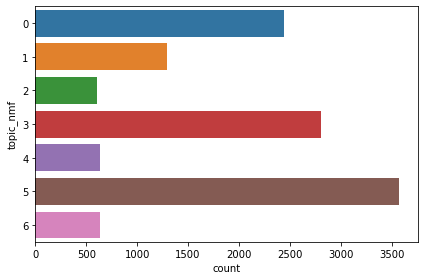

In [36]:
sns.countplot(data = df, y = 'topic_nmf')
tight_graph()

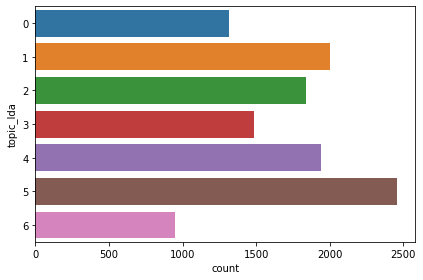

In [38]:
sns.countplot(data = df, y = 'topic_lda')
tight_graph()

In [41]:
df['topic_nmf'].value_counts()

5    3577
3    2808
0    2439
1    1294
4     639
6     635
2     600
Name: topic_nmf, dtype: int64

In [61]:
def create_word_map(column):
    for i in range(6):
        current_topic = df[df[column] == i]
        plt.subplot(4,3,i+1)
        wordcloud2 = WordCloud().generate(' '.join(current_topic['Article']))
        plt.imshow(wordcloud2, interpolation="bilinear")

    plt.gcf().set_size_inches(15,15)

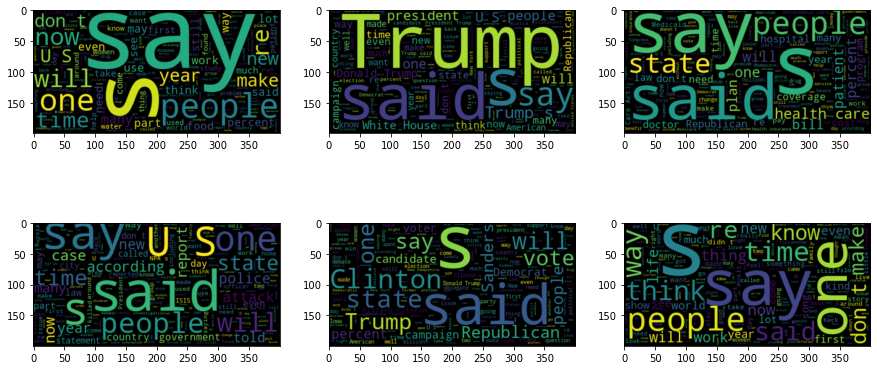

In [62]:
create_word_map('topic_nmf')

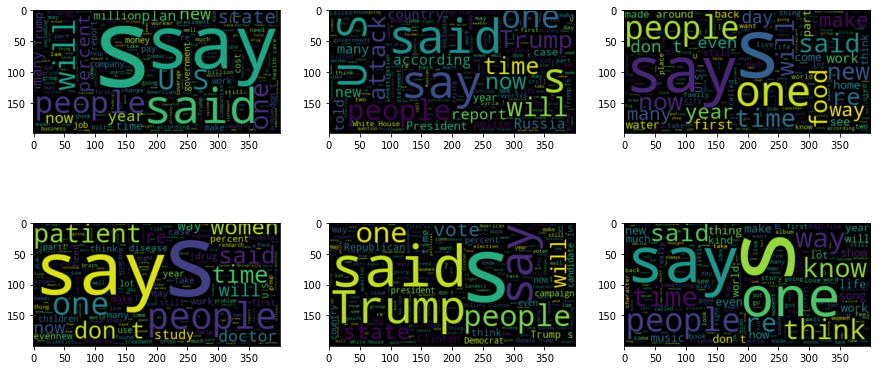

In [63]:
create_word_map('topic_lda')

# Modelling QUORA:

In [64]:
df2 = pd.read_csv('quora_questions.csv')

In [65]:
df2.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [66]:
df2.isnull().sum()

Question    0
dtype: int64

In [68]:
df2['length_of_article'] = df2['Question'].apply(lambda x: len(x))

In [70]:
df2.head()

,Question,length_of_article
0,What is the step by step guide to invest in sh...,66
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,51
2,How can I increase the speed of my internet co...,73
3,Why am I mentally very lonely? How can I solve...,50
4,"Which one dissolve in water quikly sugar, salt...",76


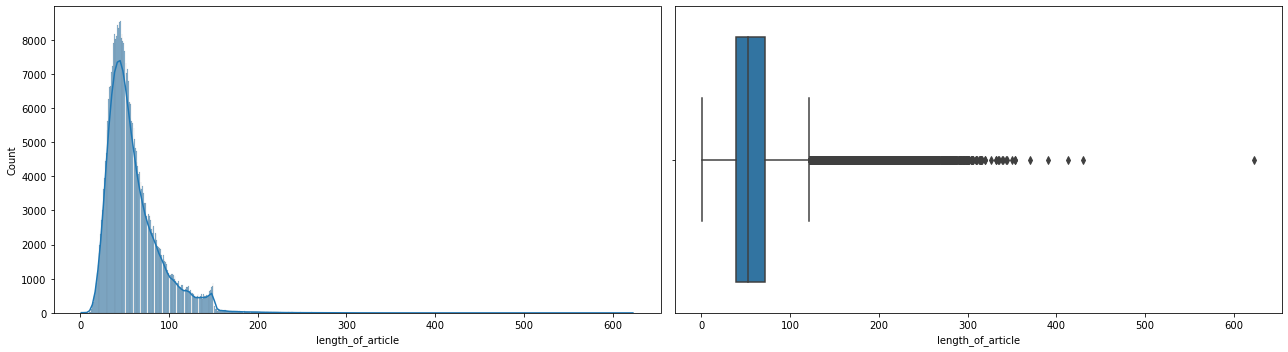

In [71]:
fig, (ax,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (18,5))

sns.histplot(data = df2, x ='length_of_article', ax = ax, kde = True)
sns.boxplot(data = df2, x = 'length_of_article', ax =ax2)

tight_graph()

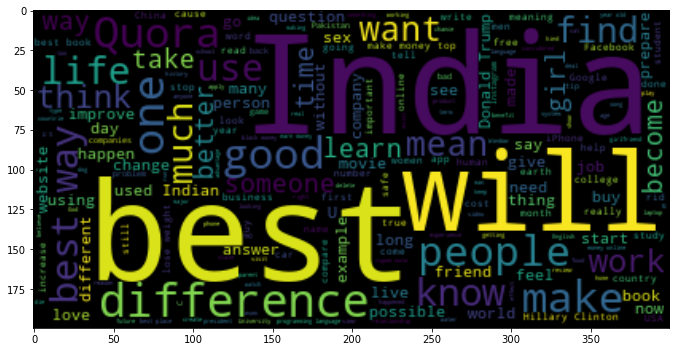

In [72]:
fig ,ax = plt.subplots(figsize = (12,5))

wordcloud2 = WordCloud().generate(' '.join(df2['Question']))
plt.imshow(wordcloud2, interpolation="bilinear")

tight_graph()

In [75]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
nmf_model = NMF(n_components = 9, random_state = 42)
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
lda = LatentDirichletAllocation(n_components=9,random_state=42)

In [76]:
df2_nmf = tfidf.fit_transform(df2['Question'])
df2_lda = cv.fit_transform(df2['Question'])

In [77]:
nmf_model.fit(df2_nmf)
lda.fit(df2_lda)

LatentDirichletAllocation(n_components=9, random_state=42)

In [78]:
print_topics(nmf_model,tfidf)

THE TOP 15 WORDS FOR TOPIC #0
['places', 'phone', 'buy', 'lose', 'laptop', 'time', 'movie', 'ways', 'weight', '2016', 'books', 'book', 'movies', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['exist', 'compare', 'look', 'cost', 'really', 'girl', 'love', 'long', 'time', 'sex', 'work', 'feel', 'like', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['post', 'answered', 'use', 'improvement', 'delete', 'easily', 'asked', 'google', 'answer', 'answers', 'ask', 'question', 'questions', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['friends', 'facebook', 'black', 'internet', 'free', 'easiest', 'home', 'easy', 'youtube', 'ways', 'way', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['employees', 'good', 'live', 'want', 'like', 'real', 'love', 'things', 'day', 'know', 'important', 'thing', 'meaning', 'purpose', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['company', 'olympics', 'china', 'available', 'engineering', 'business', 'spotify', 'country', 'start', 'good', 'job', '

In [79]:
print_topics(lda,cv)

THE TOP 15 WORDS FOR TOPIC #0
['com', 'career', 'app', 'use', 'used', 'google', 'android', 'india', 'software', 'difference', 'good', 'examples', 'does', 'engineering', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['modi', 'favorite', 'rupee', 'interview', 'money', 'rs', 'english', 'think', 'india', 'black', 'stop', 'indian', '1000', 'notes', '500']


THE TOP 15 WORDS FOR TOPIC #2
['possible', 'universe', 'hotel', 'police', 'compare', 'safe', 'travel', 'average', 'water', 'energy', 'did', 'good', 'does', 'time', 'life']


THE TOP 15 WORDS FOR TOPIC #3
['answer', 'going', 'movie', 'ask', 'day', 'don', 'does', 'thing', 'question', 'things', 'questions', 'know', 'new', 'quora', 'people']


THE TOP 15 WORDS FOR TOPIC #4
['different', 'number', 'power', 'country', 'women', 'men', 'college', 'email', 'differences', 'rid', 'car', 'password', 'difference', 'india', 'job']


THE TOP 15 WORDS FOR TOPIC #5
['china', 'think', 'girl', 'math', 'work', 'war', 'india', 'sex', 'long', 'feel', 'did', 'mean',

In [81]:
topic_results_nmf = nmf_model.transform(df2_nmf).argmax(axis = 1)
topic_results_lda = lda.transform(df2_lda).argmax(axis = 1)

In [82]:
df2['topic_nmf'] = topic_results_nmf
df2['topic_lda'] = topic_results_lda

In [83]:
df2.head()

,Question,length_of_article,topic_nmf,topic_lda
0,What is the step by step guide to invest in sh...,66,5,7
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,51,4,4
2,How can I increase the speed of my internet co...,73,3,8
3,Why am I mentally very lonely? How can I solve...,50,8,5
4,"Which one dissolve in water quikly sugar, salt...",76,1,5
